## Station Plot with Geopandas Based on Zipcode

### Import Package


In [45]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pyproj import Transformer
from pyproj import CRS
from geopandas import GeoDataFrame
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3
import os
import sys
from descartes import PolygonPatch
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.dirname(os.getcwd()))
import alphashape
%matplotlib inline

## Bike Station Information

In [28]:
df_2019 = pd.read_csv("E:/SI/data/Station/station2019.csv",delimiter=',')
df_2020 = pd.read_csv("E:/SI/data/Station/station2020.csv",delimiter=',')
df_2021 = pd.read_csv("E:/SI/data/Station/station2021.csv",delimiter=',')

In [29]:
points_2019 = df_2019.apply(lambda row: Point(row.longitude ,row.latitude), axis=1)
points_2020 = df_2020.apply(lambda row: Point(row.longitude ,row.latitude), axis=1)
points_2021 = df_2021.apply(lambda row: Point(row.longitude ,row.latitude), axis=1)

In [30]:
station_2019 = gpd.GeoDataFrame(df_2019, geometry=points_2019)
station_2019.crs = {'init':'epsg:4326'} # validate the longitude and latitude 
station_2020 = gpd.GeoDataFrame(df_2020, geometry=points_2020)
station_2020.crs = {'init':'epsg:4326'} # validate the longitude and latitude 
station_2021 = gpd.GeoDataFrame(df_2021, geometry=points_2021)
station_2021.crs = {'init':'epsg:4326'} # validate the longitude and latitude 

c:\Users\HUAWEI\anaconda3\envs\test\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [31]:
# Get rid of repeat stations
station_2019 = station_2019.drop_duplicates(subset=['latitude','longitude'])
station_2020 = station_2020.drop_duplicates(subset=['latitude','longitude'])
station_2021 = station_2021.drop_duplicates(subset=['latitude','longitude'])

In [32]:
# Add new stations established in 2020 and 2021
station_2020_new = station_2020[-(station_2020['longitude'].isin(station_2019['longitude']) & station_2020['latitude'].isin(station_2019['latitude']))]
station_2021_new = station_2021[-(station_2021['longitude'].isin(station_2019['longitude']) & station_2021['latitude'].isin(station_2019['latitude']))]
station_2021_new = station_2021[-(station_2021['longitude'].isin(station_2020['longitude']) & station_2021['latitude'].isin(station_2020['latitude']))]

In [21]:
# Import data from 2020

import pandas as pd
import numpy as np

frame = []
months = ['01', '02', '03', '04', '05',
          '06', '07', '08', '09', '10', '11', '12']
for month in months:
    df = pd.read_csv("E:/SI/data/2020/2020"+month +
                     "-citibike-tripdata.csv", delimiter=',')
    df = df[['start station name', 'start station latitude', 'start station longitude',
             'end station name', 'end station latitude', 'end station longitude']]
    frame.append(df)
result_2020 = pd.concat(frame)

# Get rid of repeated stations
result_2020_start = result_2020.drop(labels=['end station name', 'end station latitude',
                           'end station longitude'], axis=1).drop_duplicates(subset=['start station name'])
result_2020_start.columns = ['station name', 'latitude', 'longitude']
result_2020_end = result_2020.drop(labels=['start station name', 'start station latitude',
                         'start station longitude'], axis=1).drop_duplicates(subset=['end station name'])
result_2020_end.columns = ['station name', 'latitude', 'longitude']
result_2020 = pd.merge(result_2020_start, result_2020_end, how='outer')
result_2020.drop_duplicates(subset=['station name'])
result_2020

,station name,latitude,longitude
0,1 Ave & E 16 St,40.732219,-73.981656
1,West Drive & Prospect Park West,40.661063,-73.979453
2,E 33 St & 1 Ave,40.743227,-73.974498
3,Bank St & Hudson St,40.736529,-74.006180
4,Franklin Ave & Myrtle Ave,40.694546,-73.958014
...,...,...,...
1256,Riverview Park,40.744319,-74.043991
1257,Monmouth and 6th,40.725685,-74.048790
1258,Montgomery St,40.719420,-74.050990
1259,Glenwood Ave,40.727551,-74.071061


In [22]:
points_2020_all = result_2020.apply(lambda row: Point(row.longitude ,row.latitude), axis=1)
station_2020_all = gpd.GeoDataFrame(result_2020, geometry=points_2020_all)
station_2020_all.crs = {'init':'epsg:4326'} 
station_2020_all = station_2020_all.drop_duplicates(subset=['latitude','longitude'])
station_2020_out = station_2020_all[-(station_2020_all['longitude'].isin(station_2020['longitude']) & station_2020_all['latitude'].isin(station_2020['latitude']))]

c:\Users\HUAWEI\anaconda3\envs\test\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [23]:
# Import data of 2021 station
import pandas as pd
import numpy as np
frame = []
df = pd.read_csv("E:/SI/data/2021/202101-citibike-tripdata.csv", delimiter=',')
df = df[['start station name', 'start station latitude', 'start station longitude',
         'end station name', 'end station latitude', 'end station longitude']]
frame.append(df)
months = ['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for month in months:
    df = pd.read_csv("E:/SI/data/2021/2021"+month +
                     "-citibike-tripdata.csv", delimiter=',')
    df = df.drop(labels=['ride_id', 'rideable_type', 'started_at', 'ended_at',
                 'start_station_id', 'end_station_id', 'member_casual'], axis=1)
    df.rename(columns={'start_station_name': 'start station name', 'end_station_name': 'end station name', 'start_lat': 'start station latitude',
              'start_lng': 'start station longitude', 'end_lat': 'end station latitude', 'end_lng': 'end station longitude'}, inplace=True)
    frame.append(df)
result_2021 = pd.concat(frame)
# Get rid of repeated stations
result_2021_start = result_2021.drop(labels=['end station name', 'end station latitude',
                           'end station longitude'], axis=1).drop_duplicates(subset=['start station name'])
result_2021_start.columns = ['station name', 'latitude', 'longitude']
result_2021_end = result_2021.drop(labels=['start station name', 'start station latitude',
                         'start station longitude'], axis=1).drop_duplicates(subset=['end station name'])
result_2021_end.columns = ['station name', 'latitude', 'longitude']
result_2021 = pd.merge(result_2021_start, result_2021_end, how='outer')
result_2021.drop_duplicates(subset=['station name'])
result_2021

c:\Users\HUAWEI\anaconda3\envs\test\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\Users\HUAWEI\anaconda3\envs\test\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,station name,latitude,longitude
0,Underhill Ave & Lincoln Pl,40.674012,-73.967146
1,E 81 St & Park Ave,40.776777,-73.959010
2,Water - Whitehall Plaza,40.702551,-74.012723
3,Fulton St & Broadway,40.711066,-74.009447
4,E 91 St & Park Ave,40.783502,-73.955327
...,...,...,...
1691,Morgan Loading Docks,40.709306,-73.931175
1692,Astor Place,40.719282,-74.071262
1693,Newark Ave,40.721525,-74.046305
1694,Montgomery St,40.719420,-74.050990


In [24]:
points_2021_all = result_2021.apply(lambda row: Point(row.longitude ,row.latitude), axis=1)
station_2021_all = gpd.GeoDataFrame(result_2021, geometry=points_2021_all)
station_2021_all.crs = {'init':'epsg:4326'} # 确认经纬度有意义
station_2021_all = station_2021_all.drop_duplicates(subset=['latitude','longitude'])
station_2021_out = station_2021_all[-(station_2021_all['longitude'].isin(station_2021['longitude']) & station_2021_all['latitude'].isin(station_2021['latitude']))]
station_2021_out_new = station_2021_out[-(station_2021_out['longitude'].isin(station_2020_out['longitude']) & station_2021_out['latitude'].isin(station_2020_out['latitude']))]

c:\Users\HUAWEI\anaconda3\envs\test\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


## Layout of New York Divided by Zipcode

In [33]:
zipcode = gpd.read_file("E:/SI/data/shapefile/ZIP_CODE_040114/ZIP_CODE_040114.shp")

## Import Shapefile of New York

In [34]:
station_2019.to_crs(zipcode.crs, inplace=True)
station_2020_new.to_crs(zipcode.crs, inplace=True)
station_2021_new.to_crs(zipcode.crs, inplace=True)
station_2020_out.to_crs(zipcode.crs, inplace=True)
station_2021_out_new.to_crs(zipcode.crs, inplace=True)

c:\Users\HUAWEI\anaconda3\envs\test\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [79]:
station_2019.to_crs(zipcode.crs, inplace=True)
station_2020.to_crs(zipcode.crs, inplace=True)
station_2021.to_crs(zipcode.crs, inplace=True)

In [77]:
geom_lat = []
geom_lon = []
points_2019_2d = []
station_2019_geo = pd.DataFrame(station_2019['geometry'])
i = 0
for index, row in station_2019_geo.iterrows():
    for i in range(7,len(str(row['geometry']))):
        if str(row['geometry'])[i] == ' ':
            geom_lat.append(str(row['geometry'])[7:i])
            geom_lon.append(str(row['geometry'])[i+1:-1])

for i in range(1,len(geom_lat)):
    points_2019_2d.append((float(geom_lat[i]),float(geom_lon[i])))

[(990426.8888201675, 213205.0669894184),
 (990709.8009202413, 225364.2955761787),
 (989334.1005119393, 206044.0648005443),
 (985971.1360671074, 204300.523778058),
 (996450.5060902684, 232149.9347964168),
 (998183.5726249462, 225130.6490670532),
 (986815.896441971, 206891.5181346199),
 (988740.5847689558, 203857.7239962972),
 (986577.4415899478, 212214.501855483),
 (988227.4736132078, 204430.8656985132),
 (989865.0333321829, 208560.794252335),
 (992257.8794661509, 217443.6359120083),
 (990840.1911506347, 221920.3007409767),
 (986828.6970666385, 203424.2124117133),
 (989051.0782799321, 221603.4060035146),
 (993689.8956247908, 219009.1361724165),
 (985869.5365540904, 209512.4453977266),
 (989751.0432142979, 214345.097225577),
 (994123.1165064413, 229623.7788668746),
 (990391.8157057819, 221050.456980378),
 (990434.4830567078, 203492.0275298288),
 (991772.990274085, 225274.6369698841),
 (988175.9879194584, 202713.4849282471),
 (980722.18010365, 195234.8729487587),
 (997402.7981761668, 2279

In [82]:
geom_lat = []
geom_lon = []
points_2020_2d = []
station_2020_geo = pd.DataFrame(station_2020['geometry'])
i = 0
for index, row in station_2020_geo.iterrows():
    for i in range(7,len(str(row['geometry']))):
        if str(row['geometry'])[i] == ' ':
            geom_lat.append(str(row['geometry'])[7:i])
            geom_lon.append(str(row['geometry'])[i+1:-1])

for i in range(1,len(geom_lat)):
    points_2020_2d.append((float(geom_lat[i]),float(geom_lon[i])))

[(991316.6749764318, 210055.225173363),
 (982537.2713552524, 207613.99241094),
 (990434.4830567078, 203492.0275298288),
 (983480.7828963347, 216484.0220593154),
 (996539.2975092941, 230553.6817752803),
 (991077.7250432199, 209405.5749882444),
 (989490.8766171379, 199483.3991736399),
 (985239.441259113, 208166.7342141351),
 (993159.3226703495, 213277.1869168862),
 (986815.896441971, 206891.5181346199),
 (987396.9623191641, 219172.6197732298),
 (995070.5810160564, 216614.805919002),
 (985967.7059821443, 215795.405272399),
 (983786.9957016043, 197173.7128489994),
 (987874.1395185775, 206777.3732153549),
 (1000225.605500864, 229982.7309320918),
 (987049.8673994361, 199506.2648303166),
 (983426.5668231638, 204179.6463416608),
 (981868.8772378919, 207493.0214842907),
 (989215.2537421915, 213349.064468423),
 (998347.917322538, 231674.1216610192),
 (990677.4462858776, 208677.2139279602),
 (988431.9883333836, 211669.5165741122),
 (991520.728441619, 223076.9158209851),
 (986185.7551851085, 21714

In [85]:
geom_lat = []
geom_lon = []
points_2021_2d = []
station_2021_geo = pd.DataFrame(station_2021['geometry'])
i = 0
for index, row in station_2021_geo.iterrows():
    for i in range(7,len(str(row['geometry']))):
        if str(row['geometry'])[i] == ' ':
            geom_lat.append(str(row['geometry'])[7:i])
            geom_lon.append(str(row['geometry'])[i+1:-1])

for i in range(1,len(geom_lat)):
    points_2021_2d.append((float(geom_lat[i]),float(geom_lon[i])))

[(980722.18010365, 195234.8729487587),
 (981630.9628237978, 198337.1559482306),
 (996621.4510706526, 224730.78339033),
 (996763.8301102986, 219437.8896739317),
 (993086.6574287445, 227809.3567647223),
 (988859.135121627, 216999.3373212506),
 (983989.7735785204, 207391.3669134583),
 (989070.1688854326, 200217.5982254763),
 (991077.7250432199, 209405.5749882444),
 (989279.6194615548, 203245.5569101294),
 (988360.499794405, 217516.2834944391),
 (994707.8693449307, 218764.5759338791),
 (981656.5126198303, 199166.3107216206),
 (989047.5765036108, 217419.2019365736),
 (987703.5600862055, 213151.0864140253),
 (999417.8635367557, 233819.0265565861),
 (989751.0432142979, 214345.097225577),
 (989061.9764992263, 215054.8381908211),
 (987791.8875921133, 213613.8340079621),
 (988771.5586427478, 202384.5795743688),
 (989195.283634163, 210014.1647103194),
 (997683.9867044475, 232335.1589596305),
 (995960.1022504937, 220222.7980293606),
 (998396.0916975298, 224350.1425551629),
 (996114.7433147951, 231

In [86]:
points_2d = points_2019_2d + points_2020_2d + points_2021_2d

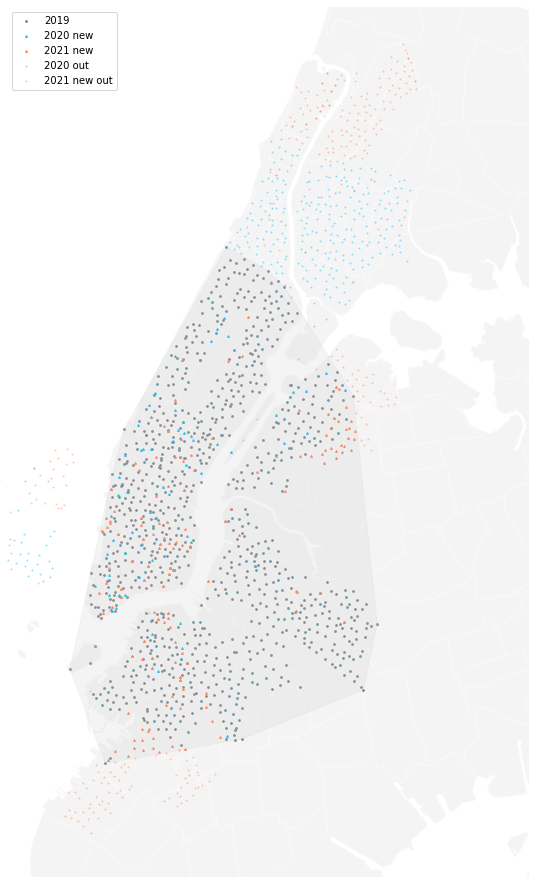

In [97]:
import matplotlib.pyplot as plt
ax = zipcode.plot(figsize=(24,16),color='#CCCCCC',edgecolor='white',linewidth=2,alpha=0.2)
station_2019.plot(ax=ax,marker='o',color='grey',markersize=3,label='2019',alpha=1)
station_2020_new.plot(ax=ax,marker='^',color='deepskyblue',markersize=3,label='2020 new',alpha=1)
station_2021_new.plot(ax=ax,marker='^',color='coral',markersize=3,label='2021 new',alpha=1)
station_2020_out.plot(ax=ax,marker='*',color='deepskyblue',markersize=2,label='2020 out',alpha=0.3)
station_2021_out_new.plot(ax=ax,marker='*',color='coral',markersize=2,label='2021 new out',alpha=0.3)
ax.scatter(*zip(*points_2d),alpha=0)
alpha_shape = alphashape.alphashape(points_2d, 0)
ax.add_patch(PolygonPatch(alpha_shape, alpha=0.2, color='#CCCCCC'))
ax.axis('off')
ax.set_xlim([970000,1030000])
ax.set_ylim([165000,265000])
ax.legend(loc='upper left')

## Zipcode Division

In [11]:
station_2019.to_crs(zipcode.crs, inplace=True)
station_2020.to_crs(zipcode.crs, inplace=True)
station_2021.to_crs(zipcode.crs, inplace=True)

In [12]:
station2019_with_zipcode = gpd.sjoin(station_2019,zipcode)
station2020_with_zipcode = gpd.sjoin(station_2020,zipcode)
station2021_with_zipcode = gpd.sjoin(station_2021,zipcode)

In [99]:
station2019_zipcodecount = station2019_with_zipcode.ZIPCODE.value_counts()
station2019_zipcodecount

11201    42
11101    33
11206    32
11231    31
11211    30
         ..
11232     2
11109     1
10281     1
10115     1
10282     1
Name: ZIPCODE, Length: 62, dtype: int64

In [100]:
station2019_zipcode = station2019_with_zipcode[['station name','latitude','longitude','ZIPCODE']]
station2019_zipcode

,station name,latitude,longitude,ZIPCODE
1,Pershing Square North,40.751873,-73.977706,10017
27,E 41 St & Madison Ave,40.752165,-73.979922,10017
102,E 47 St & 1 Ave,40.752069,-73.967844,10017
137,1 Ave & E 44 St,40.750020,-73.969053,10017
138,E 45 St & 3 Ave,40.752554,-73.972826,10017
...,...,...,...,...
920,Knickerbocker Ave & Halsey St,40.693000,-73.908240,11207
924,Halsey St & Evergreen Ave,40.688580,-73.912270,11207
925,Wilson Ave & Moffat St,40.689060,-73.905060,11207
926,Bushwick Ave & Furman Ave,40.682810,-73.906230,11207


In [ ]:

station2019_zipcode.to_csv('E:/SI/data/Station/station2019_ZIPCODE.csv',index=False)
station2020_zipcode = station2020_with_zipcode[['station name','latitude','longitude','ZIPCODE']]
station2020_zipcode.to_csv('E:/SI/data/Station/station2020_ZIPCODE.csv',index=False)
station2021_zipcode = station2021_with_zipcode[['station name','latitude','longitude','ZIPCODE']]
station2021_zipcode.to_csv('E:/SI/data/Station/station2021_ZIPCODE.csv',index=False)

## Import tripdata

In [14]:
import pandas as pd
import numpy as np
# 导入车站数据
station_2019 = pd.read_csv('E:/SI/data/Station/station2019_ZIPCODE.csv', delimiter=',')
station_2020 = pd.read_csv('E:/SI/data/Station/station2020_ZIPCODE.csv', delimiter=',')
station_2021 = pd.read_csv('E:/SI/data/Station/station2021_ZIPCODE.csv', delimiter=',')

In [15]:
# zipcode to dic
station2019_ZIPCODE = {k:v for k,v in zip(station_2019['station name'],station_2019['ZIPCODE'])}
station2020_ZIPCODE = {k:v for k,v in zip(station_2020['station name'],station_2020['ZIPCODE'])}
station2021_ZIPCODE = {k:v for k,v in zip(station_2021['station name'],station_2021['ZIPCODE'])}

In [16]:
df =  pd.read_csv("E:/SI/data/2019/201901-citibike-tripdata.csv", delimiter=',')
df = df[['tripduration','starttime','start station name','end station name','usertype',"start station latitude","start station longitude","end station latitude","end station longitude"]]
df = df[(df['start station name'].isin(station_2019['station name']))&(df['end station name'].isin(station_2019['station name']))]
#df = df.drop_duplicates(subset=["start station latitude","start station longitude","end station latitude","end station longitude"])
df['start station zipcode'] = df.apply(lambda row: station2019_ZIPCODE[row['start station name']], axis=1).tolist()
df['end station zipcode'] = df.apply(lambda row: station2019_ZIPCODE[row['end station name']], axis=1).tolist()
#df = df.drop(labels=['start station name','end station name'], axis=1)
df = df.dropna(axis=0, how='any', subset=["start station latitude","start station longitude","end station latitude","end station longitude"])

#start_station_zipcode = df.apply(lambda row: station2019_ZIPCODE[row['start station name']], axis=1)
#end_station_zipcode = df.apply(lambda row: station2019_ZIPCODE[row['end station name']], axis=1)

In [17]:
df.head()

,tripduration,starttime,start station name,end station name,usertype,start station latitude,start station longitude,end station latitude,end station longitude,start station zipcode,end station zipcode
1,316,2019-01-01 00:04:43.7360,Pershing Square North,E 39 St & 2 Ave,Subscriber,40.751873,-73.977706,40.747804,-73.973442,10017,10016
2,591,2019-01-01 00:06:03.9970,Amsterdam Ave & W 82 St,E 77 St & 3 Ave,Subscriber,40.785247,-73.976673,40.773142,-73.958562,10024,10075
3,2719,2019-01-01 00:07:03.5450,1 Ave & E 16 St,W 15 St & 6 Ave,Subscriber,40.732219,-73.981656,40.738046,-73.996430,10009,10011
4,303,2019-01-01 00:07:35.9450,Great Jones St,E 20 St & Park Ave,Subscriber,40.727434,-73.993790,40.738274,-73.987520,10012,10003
5,535,2019-01-01 00:08:33.1790,Frederick Douglass Blvd & W 115 St,Lenox Ave & W 130 St,Subscriber,40.803865,-73.955931,40.810792,-73.943068,10026,10027
